In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import matplotlib

In [2]:
# データの生成
np.random.seed(2024)
n, m = 8, 8

#コスト行列
C = np.random.rand(n, m)
a = np.random.rand(n)

#確率ベクトルのため正規化
a /= a.sum()
b = np.random.rand(m)
b /= b.sum()

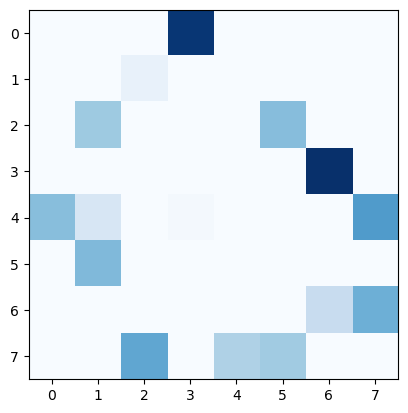

In [3]:
#最適輸送行列の計算
P = ot.emd(a, b, C)

plt.imshow(P, cmap=plt.cm.Blues)

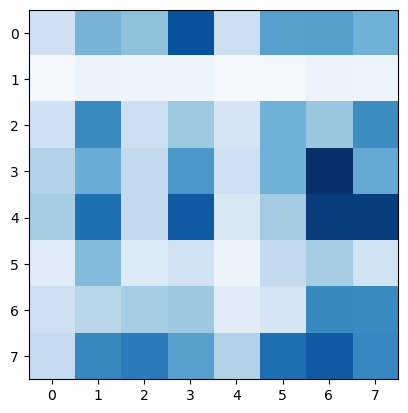

<Figure size 640x480 with 0 Axes>

In [4]:
# シンクホーンアルゴリズム（アルゴリズム 3.2）

eps = 1
# ギブスカーネルの計算
K = np.exp(- C / eps) 
v = np.ones(m)
for k in range(100):
    u = a / (K @ v)
    v = b / (K.T @ u)

# 主解
P = u.reshape(n, 1) * K * v.reshape(1, m)

# 解のプロット
plt.imshow(P, cmap=plt.cm.Blues, vmin=0) 
plt.show() 
plt.clf()

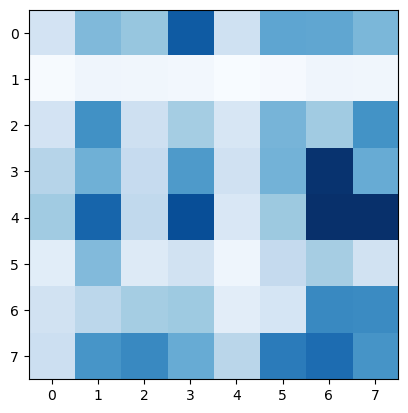

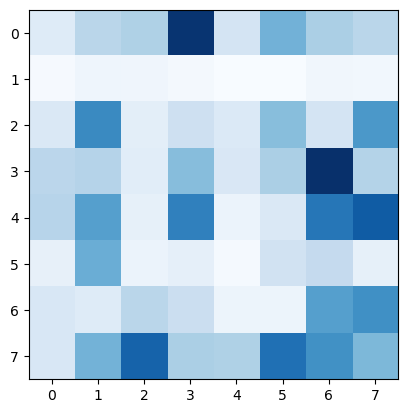

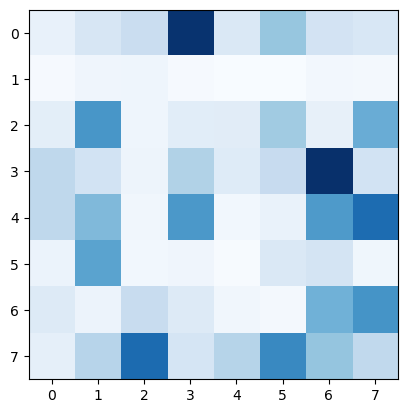

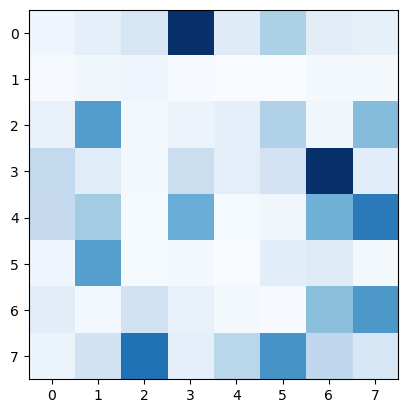

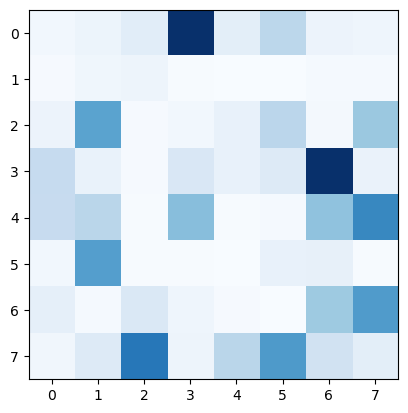

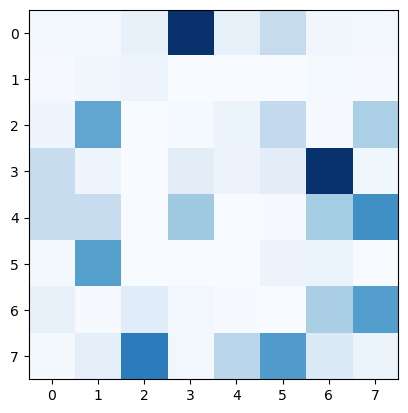

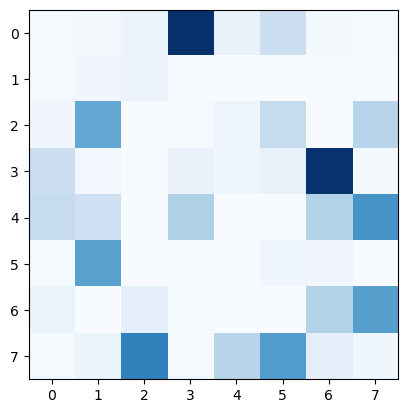

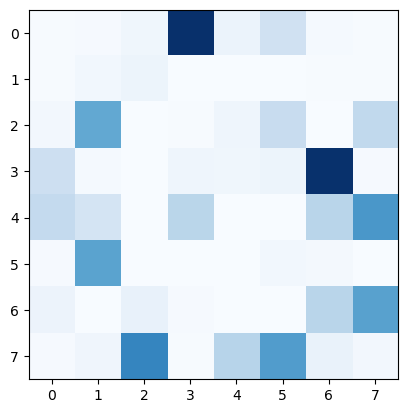

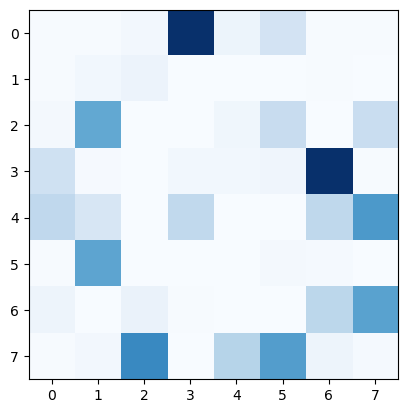

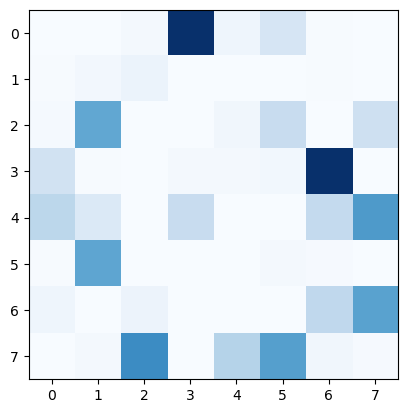

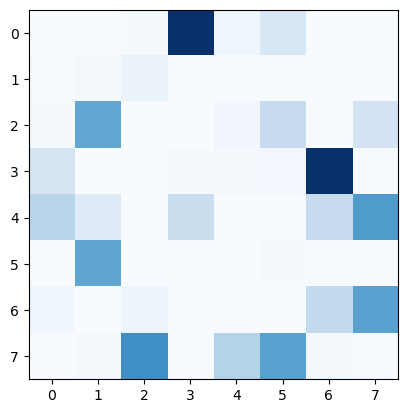

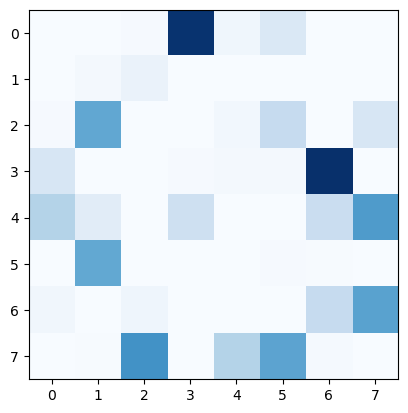

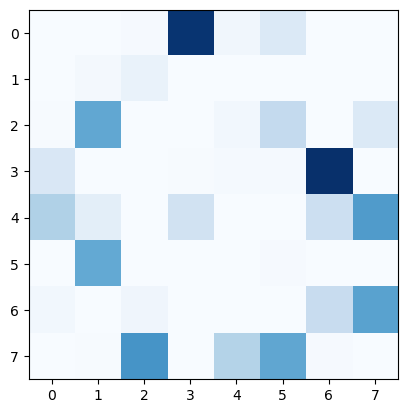

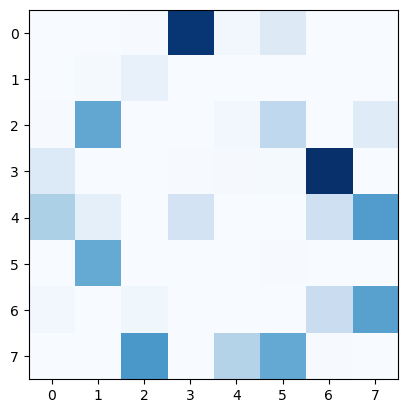

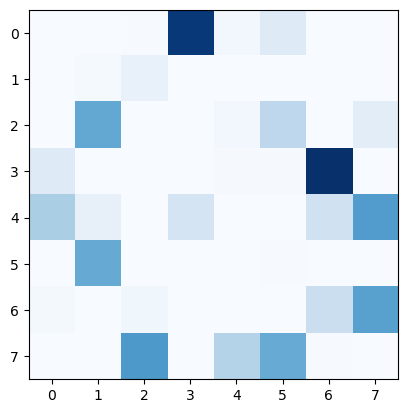

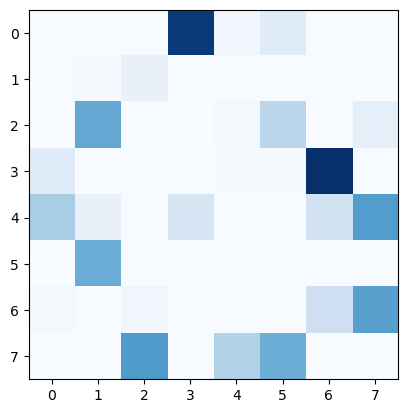

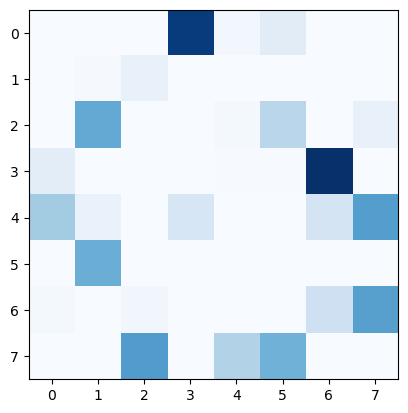

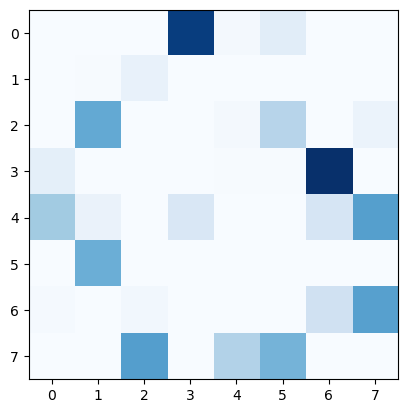

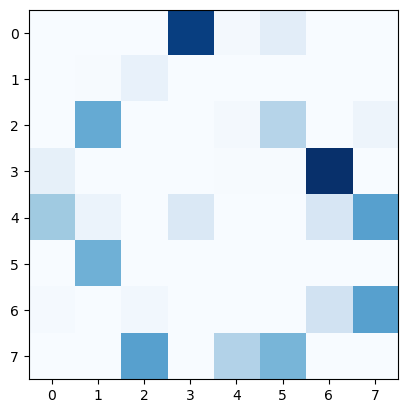

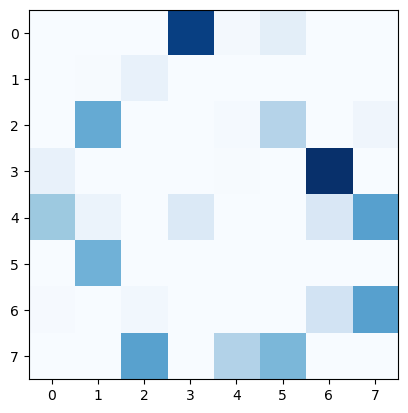

<Figure size 640x480 with 0 Axes>

In [5]:
# 近接点アルゴリズムによる正則化なしの最適輸送コストの計算（アルゴリズム 3.7）

eps = 1

# ギブスカーネルの計算
K = np.exp(- C / eps) 

#1hot vecter
P = np.ones((n, m))
v = np.ones(m)
for k in range(20):
    #普通のシンクホーンアルゴリズム
    #典型的には1回のみで終わる
    L = K * P
    u = a / (L @ v)
    v = b / (L.T @ u)

    # 主解
    P = u.reshape(n, 1) * L * v.reshape(1, m) 

    # 解のプロット
    plt.imshow(P, cmap=plt.cm.Blues) 
    plt.show() 
    plt.clf()

#だんだんと最適輸送行列に近づいていくはず